# NLP Disaster Tweets

## Imports

In [30]:
import pandas as pd
import numpy as np
import os
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Investigate Training Data

In [6]:
df = pd.read_csv('train.csv')
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [9]:
#Find repeats 
df["text"].value_counts()

11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...        10
#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_     6
The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'                               6
He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam                      6
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives                                                                                  5
                                                                                                                                                ..
We just happened to get on the same road right behind the buses I'm dead serious                                      

## Clean Training Data

In [10]:
#Delete columns you don't need
df = df.drop(['id', 'location'], inplace = False, axis=1)
df

,keyword,text,target
0,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
7608,NaN,Two giant cranes holding a bridge collapse int...,1
7609,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,NaN,Police investigating after an e-bike collided ...,1


In [11]:
# Insert keywords in column if NA...IF it has the keyword in the text(IF U HAVE TIME NOT WORTH FOR 61 RN)

In [12]:
#lemmatize, stem words, stop words, etc.

In [13]:
#Tokenize tweet 
def tokenize(txt):
    tokens = re.split('\W+', txt)
    return tokens

df['text'] = df['text'].apply(lambda x: tokenize(x.lower()))

In [14]:
#Punctuation
punctuation = string.punctuation

def remove_punctuation(txt_tokenized):
    no_punc = [word for word in txt_tokenized if word not in punctuation]
    return no_punc

df['text'] = df['text'].apply(lambda x: remove_punctuation(x))

In [15]:
#Remove stopwords from plot description
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

df['text'] = df['text'].apply(lambda x: remove_stopwords(x))

In [16]:
#Lemitize
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()


def lemmatization(txt_tokenized):
    text = [wn.lemmatize(word) for word in txt_tokenized]
    return text

df['text'] = df['text'].apply(lambda x: lemmatization(x))

In [17]:
#Check out tweets 
df['text']

0       [deed, reason, earthquake, may, allah, forgive...
1           [forest, fire, near, la, ronge, sask, canada]
2       [resident, asked, shelter, place, notified, of...
3       [13, 000, people, receive, wildfire, evacuatio...
4       [got, sent, photo, ruby, alaska, smoke, wildfi...
                              ...                        
7608    [two, giant, crane, holding, bridge, collapse,...
7609    [aria_ahrary, thetawniest, control, wild, fire...
7610    [m1, 94, 01, 04, utc, 5km, volcano, hawaii, ht...
7611    [police, investigating, e, bike, collided, car...
7612    [latest, home, razed, northern, california, wi...
Name: text, Length: 7613, dtype: object

In [18]:
df

,keyword,text,target
0,NaN,"[deed, reason, earthquake, may, allah, forgive...",1
1,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,NaN,"[resident, asked, shelter, place, notified, of...",1
3,NaN,"[13, 000, people, receive, wildfire, evacuatio...",1
4,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1
...,...,...,...
7608,NaN,"[two, giant, crane, holding, bridge, collapse,...",1
7609,NaN,"[aria_ahrary, thetawniest, control, wild, fire...",1
7610,NaN,"[m1, 94, 01, 04, utc, 5km, volcano, hawaii, ht...",1
7611,NaN,"[police, investigating, e, bike, collided, car...",1


In [19]:
# Insert keywords in column if NA...IF it has the keyword in the text

In [28]:
df = df.dropna()

## Pull Insights from dataframe

In [37]:
len(df['keyword'].unique())

221

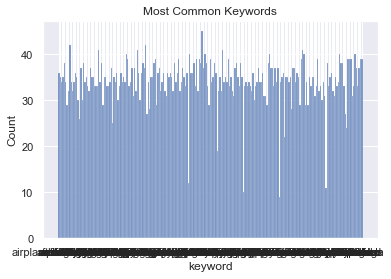

In [31]:
sns.set_theme(style="darkgrid")
sns.histplot(df, x='keyword')
plt.title('Most Common Keywords');

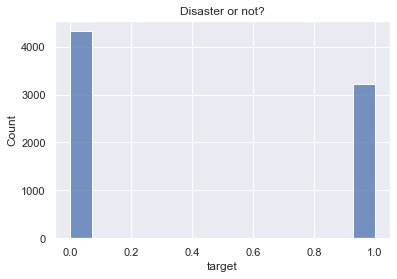

In [40]:
sns.set_theme(style="darkgrid")
sns.histplot(df, x='target')
plt.title('Disaster or not?');
#Balance me?

In [ ]:
#Word ocourance top tier list

## Create Model

## Create model (with pre-trained)